# UMLPAD: Using Machine Learning for prediction of Autism Spectrum Disorder

## 1) Import the data from UCI website and extract file from zip folder 

In [1]:
from autism_data.arff_read import arff_to_df
from autism_data.arff_read import df_get_uniform_dummies
#from ml_tools.scoring import log_loss
from sklearn.metrics import log_loss

import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
plt.style.use('seaborn-notebook')

%matplotlib inline

In [2]:
df = arff_to_df()
df_adult = arff_to_df("https://archive.ics.uci.edu/ml/machine-learning-databases/00426/Autism-Adult-Data%20Plus%20Description%20File.zip",'Autism-Adult-Data.arff')
df_adolescent = arff_to_df('https://archive.ics.uci.edu/ml/machine-learning-databases/00420/Autism-Adolescent-Data%20Plus%20Description.zip','Autism-Adolescent-Data.arff')
df_child = arff_to_df('https://archive.ics.uci.edu/ml/machine-learning-databases/00419/Autism-Child-Data%20Plus%20Description.zip','Autism-Child-Data.arff')

## 2) Data Preprocessing to identify the missing values

In [3]:
df = df.append([df_adult, df_adolescent, df_child])
df.isnull().sum() 
## There are no missing values - however, I will check if there are any values that aren't missing 
##the age range don't  make sense.

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_range          0
relation           0
Class/ASD          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 291
Data columns (total 21 columns):
A1_Score           1392 non-null category
A2_Score           1392 non-null category
A3_Score           1392 non-null category
A4_Score           1392 non-null category
A5_Score           1392 non-null category
A6_Score           1392 non-null category
A7_Score           1392 non-null category
A8_Score           1392 non-null category
A9_Score           1392 non-null category
A10_Score          1392 non-null category
age                1392 non-null float64
gender             1392 non-null category
ethnicity          1392 non-null object
jaundice           1392 non-null int64
autism             1392 non-null int64
country_of_res     1392 non-null object
used_app_before    1392 non-null int64
result             1392 non-null float64
age_range          1392 non-null object
relation           1392 non-null category
Class/ASD          1392 non-null int64
dtypes: category(12), float64(2)

## 3) Exploring the Data

In [5]:
count = df.country_of_res.value_counts()
#print(count[0:40])

In [6]:
import pycountry

input_countries = df.country_of_res.astype(str)  #['American Samoa', 'Canada', 'France']

#input_countries.replace('')

countries = {}  ## defined countries as dict()
for country in pycountry.countries:
    countries[country.name] = country.alpha_2
    
#for country in input_countries   

codes = [countries.get(country, 'Unknown code') for country in input_countries]

print(country)

Country(alpha_2='ZW', alpha_3='ZWE', name='Zimbabwe', numeric='716', official_name='Republic of Zimbabwe')


In [7]:
from pygal.maps.world import World

wm = World()

wm.title = 'ASD across the world (source: Fadi Fayez Thabtah. Department of Digital Technology. Manukau Institute of Technology, Auckland, New Zealand)'
wm.add('Globalwide (%) ', {
  'us': count[0]/sum(count)*100,
  'gb': count[1]/sum(count)*100,
  'in': count[2]/sum(count)*100,
  'nz': count[3]/sum(count)*100,
  'ae': count[4]/sum(count)*100,
  'jo':count[5]/sum(count)*100,
  'au':count[6]/sum(count)*100,
  'ca':count[7]/sum(count)*100,
  'eg':count[8]/sum(count)*100,
  'af':count[9]/sum(count)*100,
  'bd':count[10]/sum(count)*100,
  'ar':count[11]/sum(count)*100,
    'br':count[12]/sum(count)*100,
    'nl':count[13]/sum(count)*100,
    'lk':count[14]/sum(count)*100,
    'ru':count[15]/sum(count)*100,
    'at':count[16]/sum(count)*100,
    'mx':count[17]/sum(count)*100,
    'sa':count[18]/sum(count)*100,
    'fr':count[19]/sum(count)*100,
    'ph':count[20]/sum(count)*100,
    
})

#wm.render()
wm.render_to_file('ASDworldmap.svg')


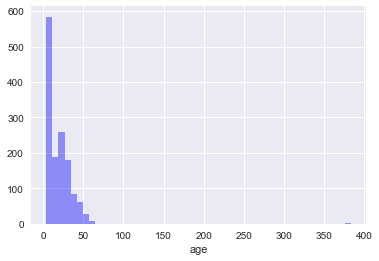

In [8]:
plot = sb.distplot(df.age, kde = False, color = "b")

## The age range is very wide and the age over 200 does not make sense.

In [9]:
df.age_filtered = df.age[(abs(np.array(df.age).astype(np.float) - np.mean(np.array(df.age).astype(np.float)))) < (10 * np.std(np.array(df.age).astype(np.float)))]

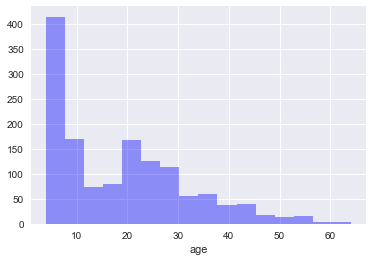

In [10]:
plot = sb.distplot(df.age_filtered, kde = False, color = "b")

## The age dataset has been filtered.

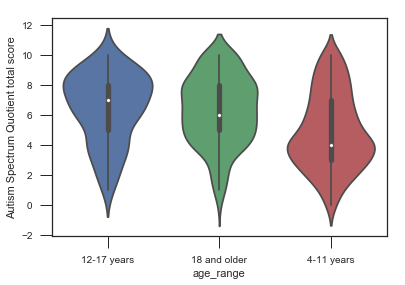

In [11]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

df['age_range'] = pd.cut(df.age,[min(df.age_filtered),11,17,max(df.age_filtered)],labels=['18 and older','12-17 years','4-11 years'],right=True)

sb.violinplot(x='age_range',y='result',data=df)
plt.ylabel('Autism Spectrum Quotient total score')
plt.show() 

In [12]:
df.ethnicity.value_counts()

White-European    489
Asian             231
Unknown           187
Middle_Eastern    155
South_Asian        81
Black              79
Others             71
Latino             41
Hispanic           32
Pasifika           16
Turkish            10
Name: ethnicity, dtype: int64

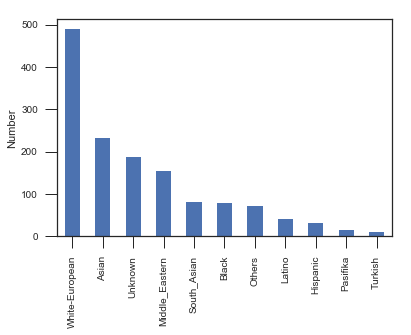

In [13]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

df.ethnicity.value_counts().plot(kind='bar')
plt.ylabel('Number')
plt.show()

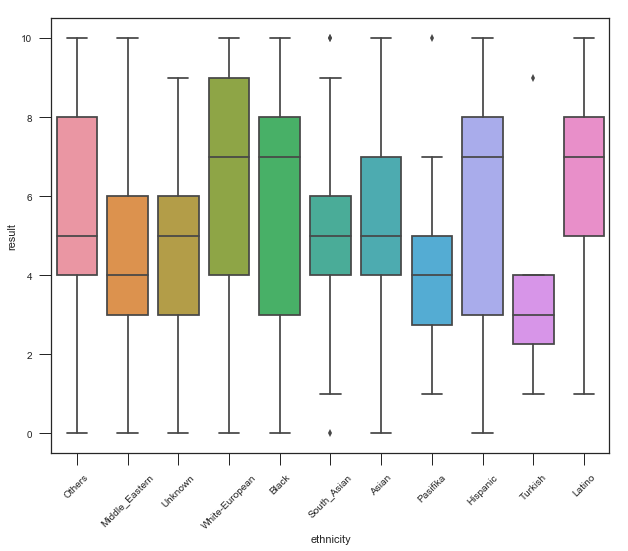

In [14]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

plt.figure(figsize=(10,8))
sb.boxplot(x='ethnicity',y='result',data=df)
plt.xticks(rotation=45)
plt.show()

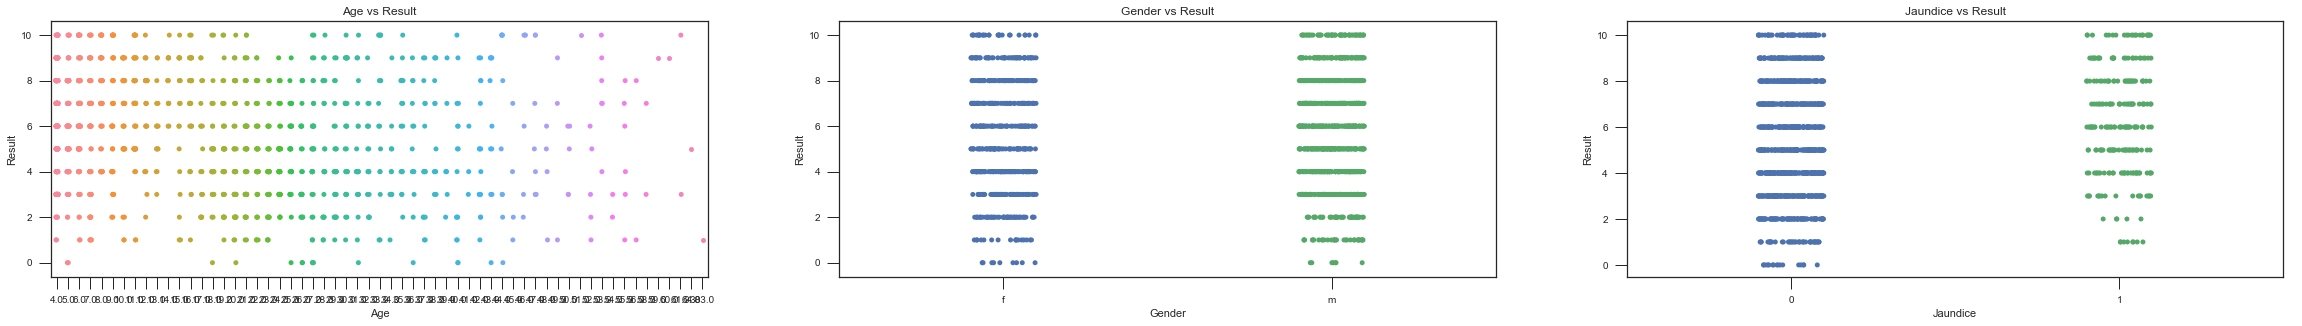

In [15]:
fig = plt.figure(figsize=(40,16))

ax1 = fig.add_subplot(331)
a1 = sb.stripplot(df.age,df.result, jitter=True)
plt.xlabel('Age')
plt.ylabel('Result')
plt.title('Age vs Result')

ax2 = fig.add_subplot(332)
a2 = sb.stripplot(df.gender,df.result, jitter=True)
plt.xlabel('Gender')
plt.ylabel('Result')
plt.title('Gender vs Result')

ax3 = fig.add_subplot(333)
a3 = sb.stripplot(df.jaundice,df.result, jitter=True)
plt.xlabel('Jaundice')
plt.ylabel('Result')
plt.title('Jaundice vs Result')

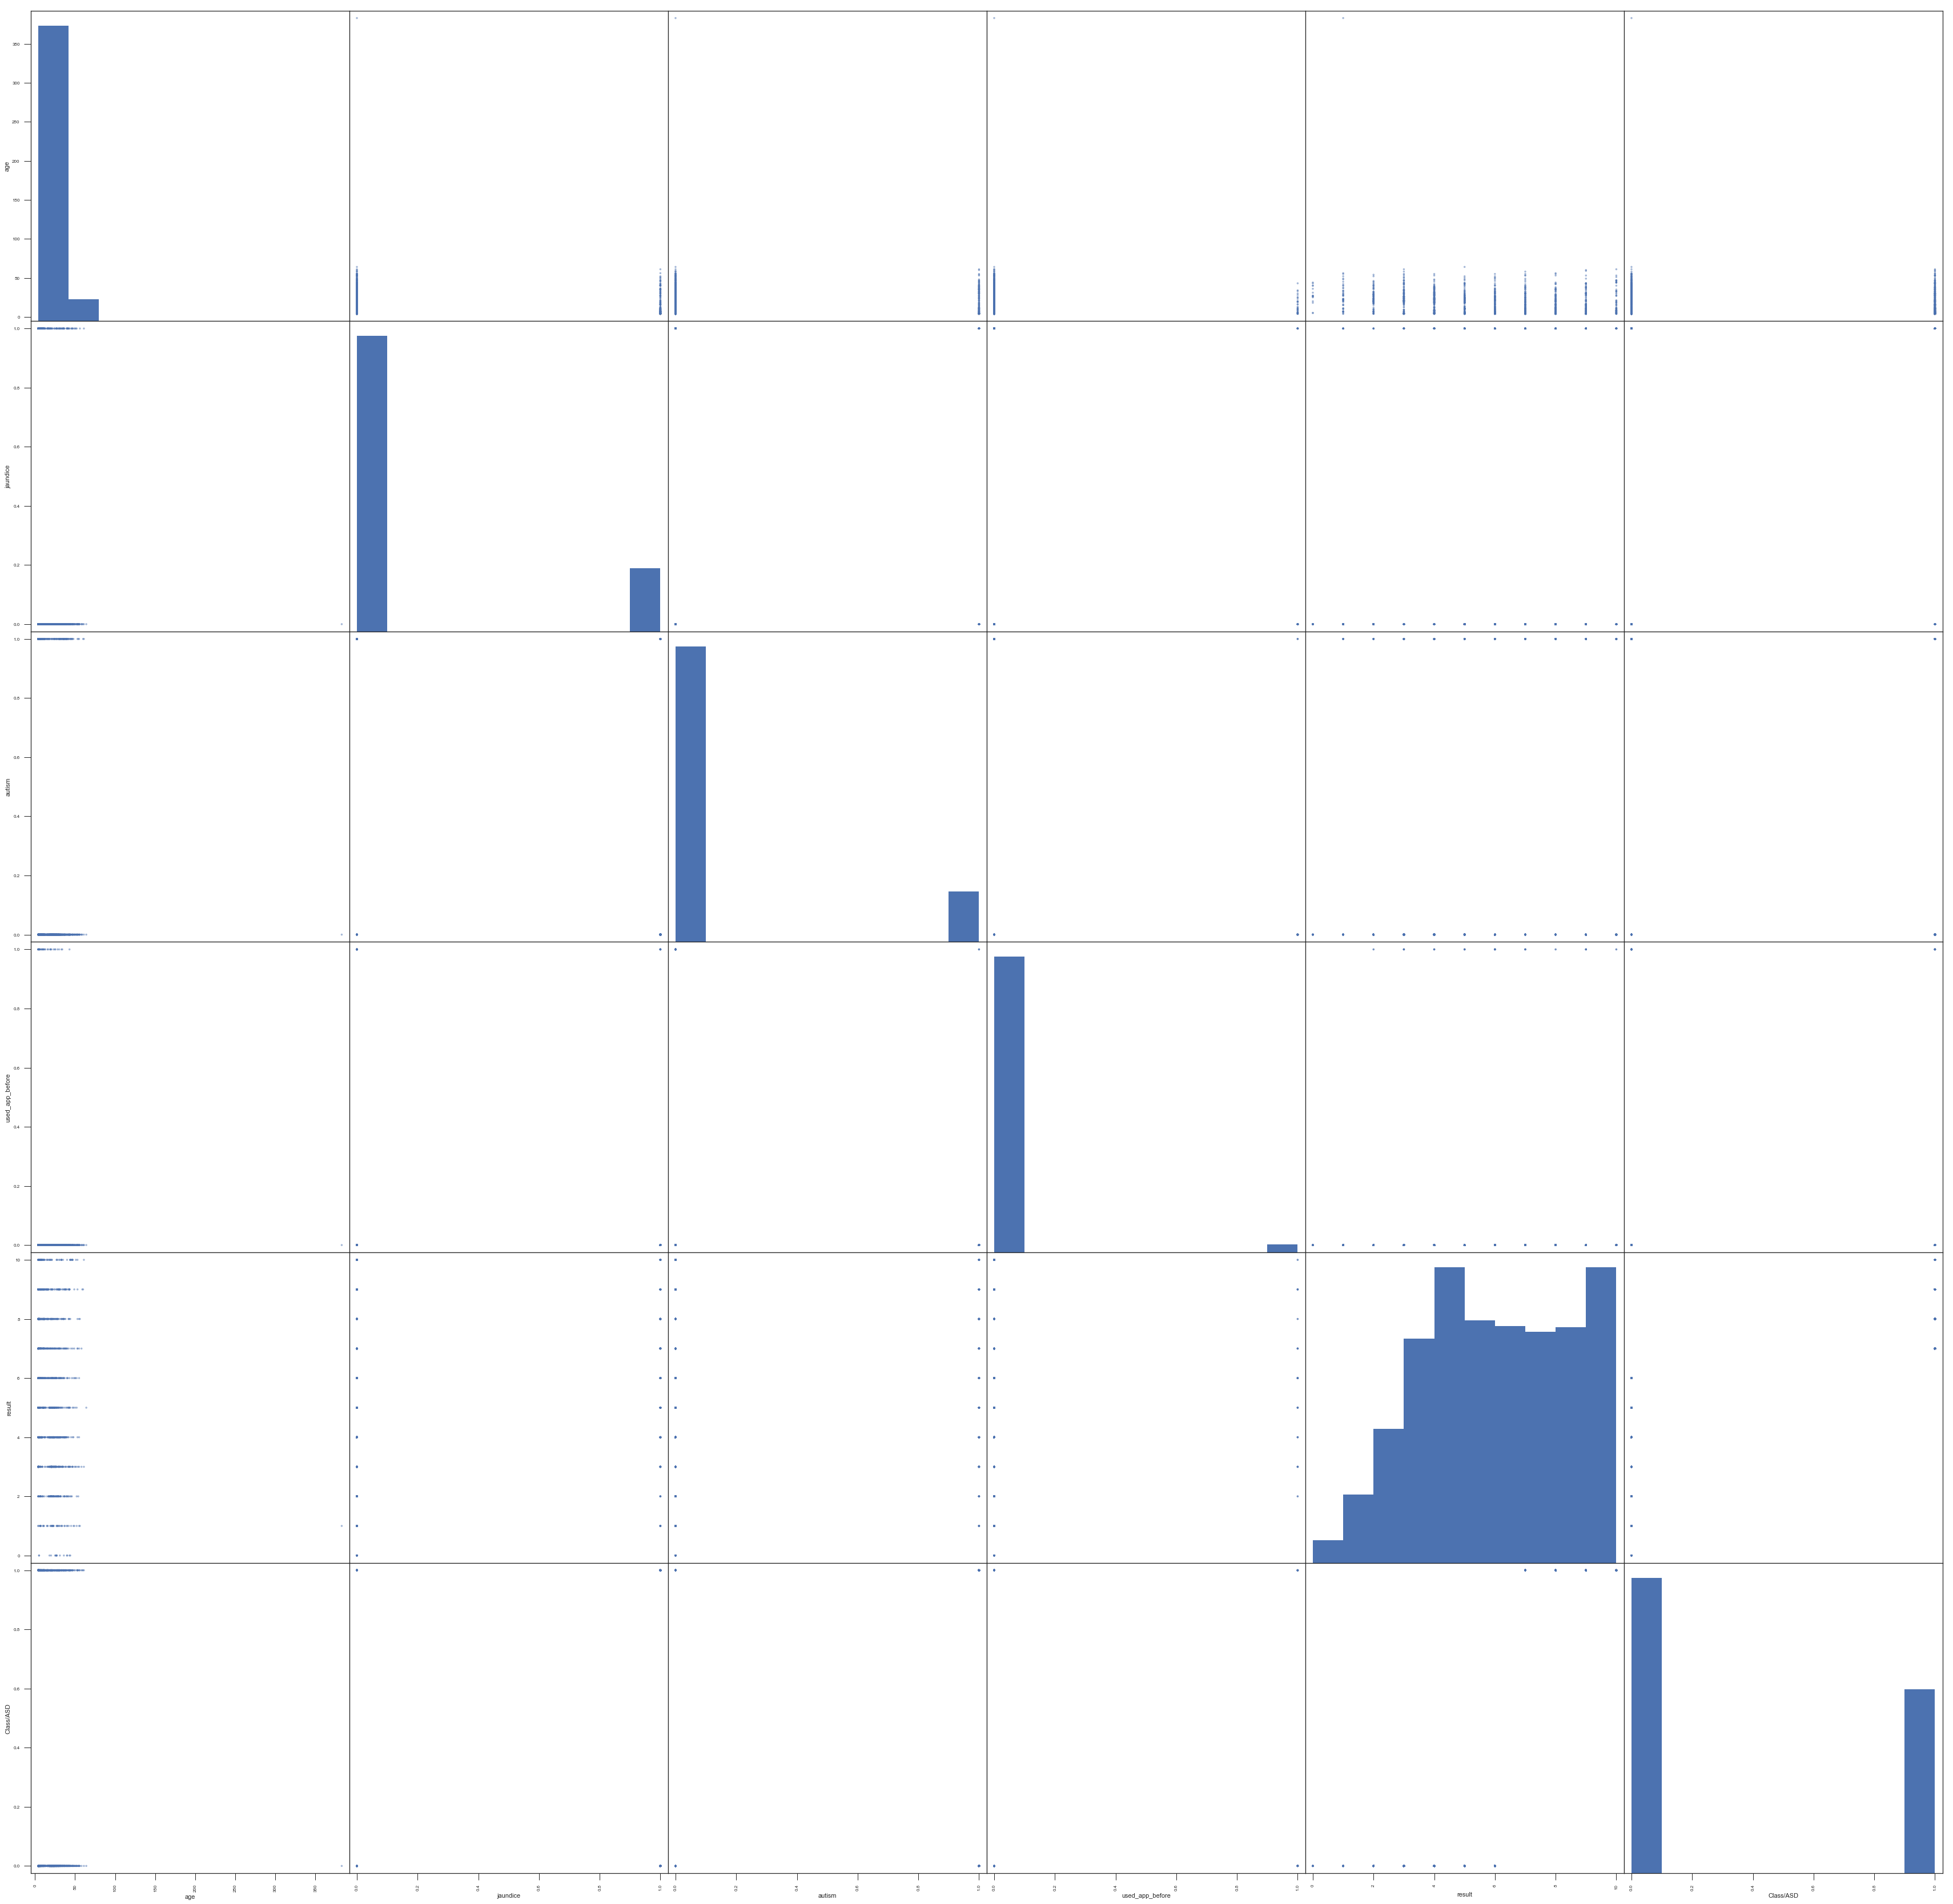

In [16]:
from pandas.plotting import scatter_matrix 
plot = scatter_matrix(df, figsize=(60, 60))

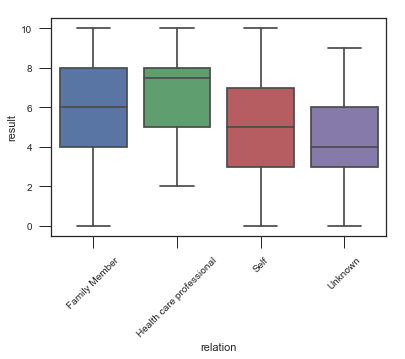

In [17]:
sb.boxplot(x='relation',y='result',data=df)
plt.xticks(rotation=45)
plt.show()

In [18]:
## Creating a dict file to covert the gender from string to int

gender = {'m': 1,'f': 0}
df.gender = [gender[item] for item in df.gender]

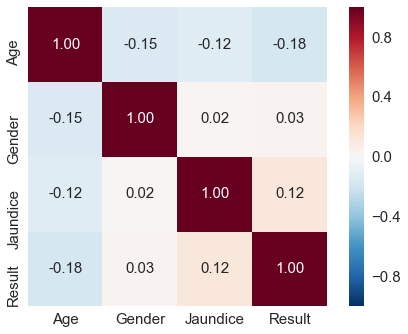

In [19]:
## Create a heatmap to explore the correlation cofficient among age, geneder, and jaudice, and ASD result

cols = ['Age', 'Gender', 'Jaundice', 'Result']
cm = np.corrcoef([df.age, df.gender, df.jaundice, df.result])
sb.set(font_scale=1.5)
hm = sb.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

## Rework the data format for Feature Engineering and Machine Learning

In [20]:
df = df.drop(['result','age'],axis=1)

In [21]:
binary_df = df_get_uniform_dummies(df)
binary_df = binary_df.iloc[:,10:]
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 291
Data columns (total 20 columns):
jaundice                        1392 non-null int64
autism                          1392 non-null int64
used_app_before                 1392 non-null int64
Class/ASD                       1392 non-null int64
gen_1                           1392 non-null int64
eth_Black                       1392 non-null int64
eth_Hispanic                    1392 non-null int64
eth_Latino                      1392 non-null int64
eth_Middle_Eastern              1392 non-null int64
eth_Others                      1392 non-null int64
eth_Pasifika                    1392 non-null int64
eth_South_Asian                 1392 non-null int64
eth_Turkish                     1392 non-null int64
eth_Unknown                     1392 non-null int64
eth_White-European              1392 non-null int64
age_18 and older                1392 non-null int64
age_4-11 years                  1392 non-null int64
rel_Health

In [22]:
binary_df.head()

,jaundice,autism,used_app_before,Class/ASD,gen_1,eth_Black,eth_Hispanic,eth_Latino,eth_Middle_Eastern,eth_Others,eth_Pasifika,eth_South_Asian,eth_Turkish,eth_Unknown,eth_White-European,age_18 and older,age_4-11 years,rel_Health care professional,rel_Self,rel_Unknown
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Explore Machine Learning Models for ASD Prediction

### Bernoulli Naive Bayes Classifier (good for binary features)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, confusion_matrix

/Users/yenshenglin/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#feature_columns = binary_df.drop(['Class/ASD'],axis=1).columns
features_df = binary_df.drop(['Class/ASD'],axis=1)
feature_names = features_df.columns
features = features_df.as_matrix()
target = binary_df.loc[:,['Class/ASD']].values.reshape(len(binary_df),)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=.2, random_state=12)

In [26]:
bern = BernoulliNB()

In [27]:
bern.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
bern_y_pred = bern.predict(X_test)
bern_y_pred_proba = bern.predict_proba(X_test)
#print(len(bern_y_pred[bern_y_pred == y_test])/len(y_test))

In [29]:
precision_score(bern_y_pred,y_test)

0.4411764705882353

In [30]:
accuracy_score(bern_y_pred,y_test)

0.6702508960573477

In [31]:
#bern_log_loss = log_loss(bern_y_pred_proba[:,1],y_test)
bern_log_loss = log_loss(y_test,bern_y_pred_proba[:,1])
bern_fp, bern_tp, bern_thresholds = roc_curve(y_test,bern_y_pred_proba[:,1])
bern_AUC = round(roc_auc_score(y_test,bern_y_pred_proba[:,1]),2)

### Logistic Regression

In [32]:
logreg = LogisticRegression(C=.1)

In [33]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_logreg_pred = logreg.predict(X_test)

In [35]:
precision_score(y_logreg_pred,y_test)

0.35294117647058826

In [36]:
accuracy_score(y_logreg_pred,y_test)

0.6666666666666666

In [37]:
y_logreg_pred_proba = logreg.predict_proba(X_test)

In [38]:
#logreg_log_loss = log_loss(y_logreg_pred_proba[:,1],y_test)
logreg_log_loss = log_loss(y_test,y_logreg_pred_proba[:,1])
log_fp, log_tp, log_thresholds = roc_curve(y_test,y_logreg_pred_proba[:,1])
log_AUC = round(roc_auc_score(y_test,y_logreg_pred_proba[0:,1]),2)

In [39]:
roc_auc_score(y_test,y_logreg_pred_proba[0:,1])

0.7421900963775342

### Decision Tree Classifier

In [40]:
tree = DecisionTreeClassifier(min_samples_leaf=1)

In [41]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
tree_y_pred = tree.predict(X_test)
tree_y_pred_proba = tree.predict_proba(X_test)

In [43]:
tree.score(X_train,y_train)

0.766397124887691

In [44]:
tree.score(X_test,y_test)

0.6738351254480287

In [45]:
#tree_log_loss = log_loss(tree_y_pred_proba[:,1],y_test)
tree_log_loss = log_loss(y_test,tree_y_pred_proba[:,1])
tree_fp,tree_tp, tree_thresholds = roc_curve(y_test,tree_y_pred_proba[:,1])
tree_AUC = round(roc_auc_score(y_test,tree_y_pred_proba[0:,1]),2)

#### Visualize the decision tree using pydotplus package

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


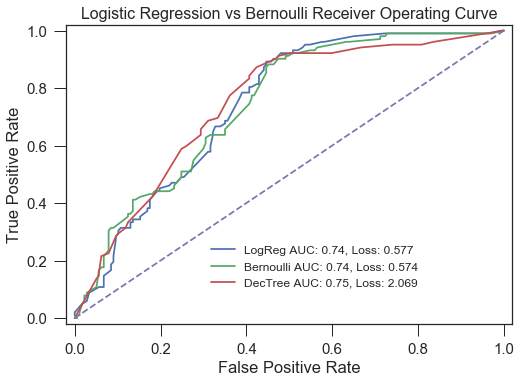

In [68]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

ax = plt.plot(log_fp,log_tp,label="LogReg AUC: {}, Loss: {}".format(log_AUC,round(logreg_log_loss,3)))
ax = plt.plot(bern_fp,bern_tp,label="Bernoulli AUC: {}, Loss: {}".format(bern_AUC,round(bern_log_loss,3)))
ax = plt.plot(tree_fp,tree_tp,label="DecTree AUC: {}, Loss: {}".format(tree_AUC,round(tree_log_loss,3)))
ax = plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.3, 0.3),loc=0,fontsize=12)
plt.title('Logistic Regression vs Bernoulli Receiver Operating Curve',fontsize=16)
plt.margins(0.02)
plt.savefig('3MLModels.png', bbox_inches='tight')
plt.show()

### Conclusion: The decision tree classifier is performing slightly better than logistic regression model and naive bayes classifier with higher cross validation scores, meaning that they are generalizing well and also have the highest AUC scores which means optimizing true positives while minimizing false positives. However, the decision tree classifier is sensitive to the change of training data, producing higher loss values.  In addition, the biggest drawback to decision trees is that the split at each node will be optimized for the dataset it is fit to. This splitting process will rarely generalize well to other data. In a austim spectrum disorder scenario, the diversity of data, meaning random selection of the data, the diversity of models, and the hyper-parameter tunining will most likely produce more accurate estimates for a predictive and accurate model. Future work will incoporate ensemble decision tree models so called Random Forest classifier and neural network model to improve the predictive probabilites with risk level.

## Saving the Logistic Regression Model and Predictions DataFrame

In [48]:
from sklearn.externals import joblib

In [49]:
joblib.dump(logreg,'autism_screening_logistic_regression_model.pkl')

['autism_screening_logistic_regression_model.pkl']

In [50]:
model_loaded = joblib.load('autism_screening_logistic_regression_model.pkl')

In [52]:
(y_logreg_pred_proba).all() == (model_loaded.predict_proba(X_test)).all()

True

In [53]:
predictions_df = pd.DataFrame(data=X_test,columns=feature_names)

In [54]:
target_df = pd.DataFrame({'Predicted Probability':y_logreg_pred_proba[:,1],
                          'Predicted Outcome':y_logreg_pred})

In [55]:
target_df['Risk Level'] = pd.cut(target_df['Predicted Probability'],[0,.25,.5,.75,1],right=False,labels=['Very Unlikely','Unlikely','Likely','Very Likely'])

In [56]:
predictions_df = pd.concat([predictions_df,target_df],axis=1)

In [57]:
predictions_df.head()

,jaundice,autism,used_app_before,gen_1,eth_Black,eth_Hispanic,eth_Latino,eth_Middle_Eastern,eth_Others,eth_Pasifika,...,eth_Unknown,eth_White-European,age_18 and older,age_4-11 years,rel_Health care professional,rel_Self,rel_Unknown,Predicted Outcome,Predicted Probability,Risk Level
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.373397,Unlikely
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0.406205,Unlikely
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.341325,Unlikely
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.240830,Very Unlikely
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0.407135,Unlikely


In [58]:
predictions_df.to_csv('ASD_screening_predictions.csv')

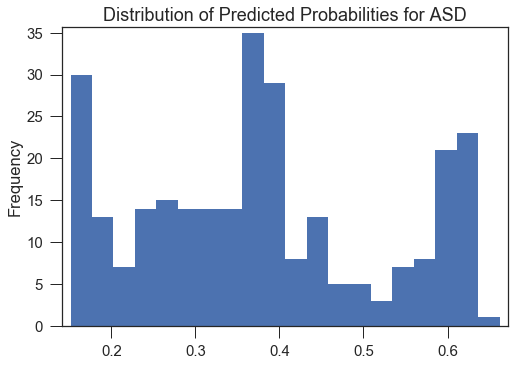

In [59]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

predictions_df['Predicted Probability'].plot(kind='hist',bins=20,title='Distribution of Predicted Probabilities for ASD')
plt.margins(0.02)
plt.show()